In [1]:
import pandas as pd
import numpy as np

### Redfin Prep

In [2]:
dfr = pd.read_csv('../../data/processed/Redfin/Redfin_April24_Processed.csv', dtype=str)

In [3]:
# match convention used by Zillow
dfr.columns = ['ZipCode', 'Date', 'MedianSalePrice', 'MedianListPrice', 'HomesSold', 'NewListings', 'Inventory']

In [4]:
dfr['Date'] = pd.to_datetime(dfr['Date'])
dfr['MedianSalePrice'] = dfr['MedianSalePrice'].astype(float)
dfr['MedianListPrice'] = dfr['MedianListPrice'].astype(float)
dfr['HomesSold'] = dfr['HomesSold'].astype(float)
dfr['NewListings'] = dfr['NewListings'].astype(float)
dfr['Inventory'] = dfr['Inventory'].astype(float)

In [5]:
dfr

,ZipCode,Date,MedianSalePrice,MedianListPrice,HomesSold,NewListings,Inventory
0,44815,2016-01-31,42500.0,NaN,2.0,NaN,1.0
1,44815,2016-02-29,55900.0,52900.0,3.0,1.0,1.0
2,44815,2016-03-31,55900.0,52900.0,1.0,1.0,1.0
3,44815,2016-04-30,51950.0,52900.0,2.0,1.0,NaN
4,44815,2016-05-31,48000.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
1931395,17765,2023-12-31,79000.0,74950.0,1.0,2.0,1.0
1931396,17765,2024-01-31,NaN,NaN,NaN,NaN,NaN
1931397,17765,2024-02-29,77500.0,95000.0,2.0,3.0,NaN
1931398,17765,2024-03-31,77500.0,172450.0,2.0,2.0,NaN


### ZHVI Prep

In [6]:
dfz = pd.read_csv('../../data/processed/ZHVI/ZHVI_April24_Processed.csv', dtype=str)

In [7]:
dfz['ZHVI'] = dfz['ZHVI'].astype(float)
dfz['Date'] = pd.to_datetime(dfz['Date'])

In [8]:
dfz = dfz[['Date', 'ZipCode', 'ZHVI']]

In [9]:
dfz

,Date,ZipCode,ZHVI
0,2004-01-31,77494,225082.0
1,2004-02-29,77494,226204.0
2,2004-03-31,77494,227643.0
3,2004-04-30,77494,228472.0
4,2004-05-31,77494,229136.0
...,...,...,...
3569715,2023-12-31,14441,221449.0
3569716,2024-01-31,14441,218865.0
3569717,2024-02-29,14441,216495.0
3569718,2024-03-31,14441,217303.0


In [10]:
# This will speed up the merge since Redfin data only goes back to 2016
dfz = dfz[dfz['Date'] > '2016-01-01']

### Merge

In [11]:
df = dfr.merge(dfz, how='inner', right_on=['Date', 'ZipCode'], left_on=['Date', 'ZipCode'])

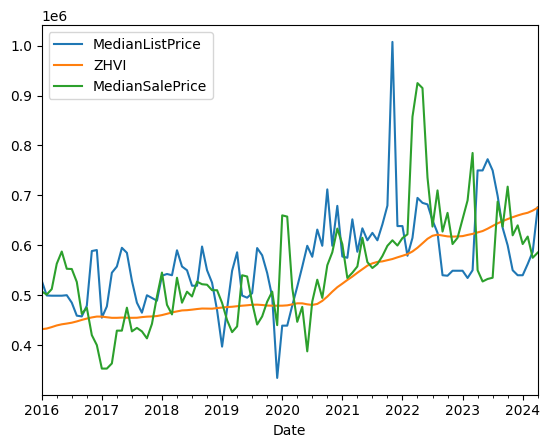

In [12]:
df[df['ZipCode'] == '10516'].set_index('Date')[['MedianListPrice', 'ZHVI', 'MedianSalePrice']].plot();

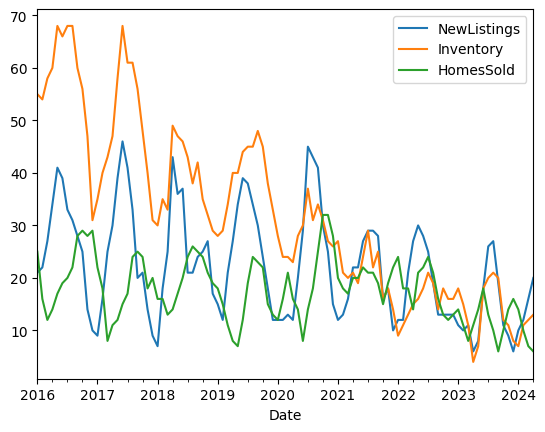

In [13]:
df[df['ZipCode'] == '10516'].set_index('Date')[['NewListings','Inventory', 'HomesSold']].plot();

In [14]:
df.to_csv('../../data/merged/Merged_April24.csv', index= False)